# ))))))))))))))))))))))))))))))))))))))))TEAM-06((((((((((((((((((((((((((((((((((((((((((((((((((((((


                                ~  Molecular Biology (Promoter Gene Sequences) ~

### 1. Importing necessary libraries

In [22]:
#datastructures and tools
import pandas as pd

#matrices and arrays
import numpy as np

#vizualizations
import seaborn as sns
import matplotlib.pyplot as plt

#to hide harmless warnings
import warnings
warnings.filterwarnings('ignore')

# scale the data
from sklearn.preprocessing import StandardScaler

# split the data
from sklearn.model_selection import train_test_split

#knn neighbour model
from sklearn.neighbors import KNeighborsClassifier
#decision tree model
from sklearn.tree import DecisionTreeClassifier
#random forest
from sklearn.ensemble import RandomForestClassifier
#adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
#Bagging model
from sklearn.ensemble import BaggingClassifier
#linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#logistic regression
from sklearn.linear_model import LogisticRegression

#Gaussian NB
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

#SVC 
from sklearn.svm import SVC 

#Xgboost
from xgboost import XGBClassifier
import xgboost as xgb 


#for cross validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

#measure accuracy of predictions
from sklearn import metrics
from sklearn import metrics as mat
#to get complete classification report
from sklearn.metrics import classification_report

### 2.Data acquistion

In [23]:
# data source - https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+(Promoter+Gene+Sequences)
df = pd.read_csv('dataset.csv')
df

,CLASS,P-50,P-49,P-48,P-47,P-46,P-45,P-44,P-43,P-42,...,P-2,P-1,P0,P1,P2,P3,P4,P5,P6,P7
0,+,S10,t,a,c,t,a,g,c,a,...,g,g,c,t,t,g,t,c,g,t
1,+,AMPC,t,g,c,t,a,t,c,c,...,g,c,a,t,c,g,c,c,a,a
2,+,AROH,g,t,a,c,t,a,g,a,...,c,c,a,c,c,c,g,g,c,g
3,+,DEOP2,a,a,t,t,g,t,g,a,...,t,a,a,c,a,a,a,c,t,c
4,+,LEU1_TRNA,t,c,g,a,t,a,a,t,...,t,c,c,g,t,g,g,t,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,-,799,c,c,t,c,a,a,t,g,...,g,g,a,a,c,t,a,t,a,t
102,-,987,g,t,a,t,t,c,t,c,...,t,t,c,a,a,c,a,t,t,g
103,-,1226,c,g,c,g,a,c,t,a,...,c,a,a,g,g,c,t,t,c,c
104,-,794,c,t,c,g,t,c,c,t,...,a,a,g,g,a,g,g,a,a,c


### 3.Feature engineering (One hot Encoding)

In [24]:
df.columns

Index(['CLASS', 'P-50', 'P-49', 'P-48', 'P-47', 'P-46', 'P-45', 'P-44', 'P-43',
       'P-42', 'P-41', 'P-40', 'P-39', 'P-38', 'P-37', 'P-36', 'P-35', 'P-34',
       'P-33', 'P-32', 'P-31', 'P-30', 'P-29', 'P-28', 'P-27', 'P-26', 'P-25',
       'P-24', 'P-23', 'P-22', 'P-21', 'P-20', 'P-19', 'P-18', 'P-17', 'P-16',
       'P-15', 'P-14', 'P-13', 'P-12', 'P-11', 'P-10', 'P-9', 'P-8', 'P-7',
       'P-6', 'P-5', 'P-4', 'P-3', 'P-2', 'P-1', 'P0', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7'],
      dtype='object')

In [26]:
# replacing the target classes
df["CLASS"] = df["CLASS"].replace({"+":1,"-":0})

In [27]:
df = pd.get_dummies(df,columns=['P-50','P-49','P-48','P-47','P-46','P-45','P-44','P-43','P-42',
                                'P-41','P-40','P-39','P-38','P-37','P-36','P-35','P-34',
                                'P-33','P-32','P-31','P-30','P-29','P-28','P-27','P-26','P-25',
                               'P-24','P-23','P-22','P-21','P-20','P-19','P-18','P-17','P-16',
                               'P-15','P-14','P-13','P-12','P-11','P-10','P-9','P-8','P-7',
                               'P-6','P-5','P-4','P-3','P-2','P-1','P0','P1','P2','P3','P4',
                                'P5','P6','P7'],drop_first=True)
df

,CLASS,P-50_1024,P-50_1108,P-50_1149,P-50_1163,P-50_1169,P-50_1171,P-50_1203,P-50_1216,P-50_1218,...,P4_t,P5_c,P5_g,P5_t,P6_c,P6_g,P6_t,P7_c,P7_g,P7_t
0,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
103,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### 4.Splitting the data

In [44]:
X = df.drop("CLASS",axis=1)
y = df["CLASS"]

In [45]:
# Split train - test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.50,stratify=y,random_state=42)

In [46]:
X_train.shape

(53, 276)

In [47]:
X_test.shape

(53, 276)

### 5. Training different models on train data and Classifying the test data

In [48]:
# ML models
dt = DecisionTreeClassifier()                                       #decision tree
rf = RandomForestClassifier()                                       #random forest
ab = AdaBoostClassifier()                                           #adaboost
gb = GradientBoostingClassifier()                                   #gradientboost
knn = KNeighborsClassifier()                                        #knn 
bc = BaggingClassifier()                                            #bagging
ldc = LinearDiscriminantAnalysis()                                  #Linear discriminant
svm = SVC()                                                         #support vector machines 
lr = LogisticRegression()                                           #logistic regression
xgb = XGBClassifier()                                               #xtreme boosting
mnb = MultinomialNB()                                               #multinomial naive bayes
bnb = BernoulliNB()                                                 #bernoulli naive bayes
gnb = GaussianNB()                                                  #bernoulli naive bayes

DecisionTreeClassifier() 

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.78      0.81      0.79        26

    accuracy                           0.79        53
   macro avg       0.79      0.79      0.79        53
weighted avg       0.79      0.79      0.79        53



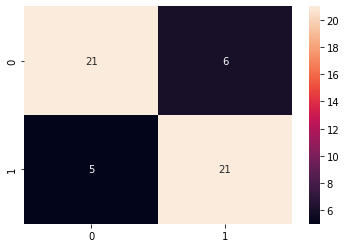

____________________________________________________________________________________________________
RandomForestClassifier() 

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.86      0.92      0.89        26

    accuracy                           0.89        53
   macro avg       0.89      0.89      0.89        53
weighted avg       0.89      0.89      0.89        53



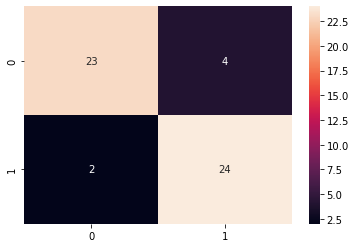

____________________________________________________________________________________________________
AdaBoostClassifier() 

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.86      0.92      0.89        26

    accuracy                           0.89        53
   macro avg       0.89      0.89      0.89        53
weighted avg       0.89      0.89      0.89        53



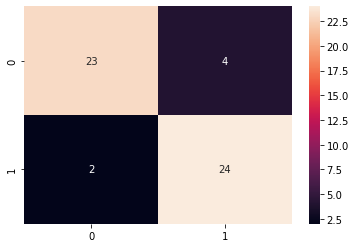

____________________________________________________________________________________________________
GradientBoostingClassifier() 

              precision    recall  f1-score   support

           0       0.91      0.74      0.82        27
           1       0.77      0.92      0.84        26

    accuracy                           0.83        53
   macro avg       0.84      0.83      0.83        53
weighted avg       0.84      0.83      0.83        53



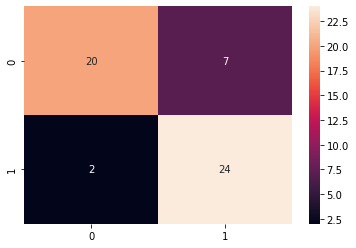

____________________________________________________________________________________________________
KNeighborsClassifier() 

              precision    recall  f1-score   support

           0       0.80      0.44      0.57        27
           1       0.61      0.88      0.72        26

    accuracy                           0.66        53
   macro avg       0.70      0.66      0.65        53
weighted avg       0.70      0.66      0.64        53



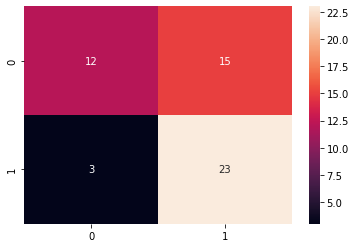

____________________________________________________________________________________________________
BaggingClassifier() 

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.78      0.81      0.79        26

    accuracy                           0.79        53
   macro avg       0.79      0.79      0.79        53
weighted avg       0.79      0.79      0.79        53



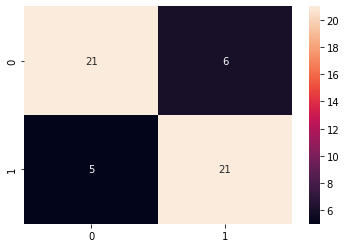

____________________________________________________________________________________________________
LinearDiscriminantAnalysis() 

              precision    recall  f1-score   support

           0       0.85      0.63      0.72        27
           1       0.70      0.88      0.78        26

    accuracy                           0.75        53
   macro avg       0.77      0.76      0.75        53
weighted avg       0.77      0.75      0.75        53



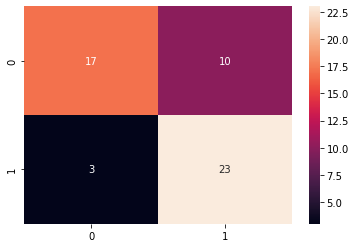

____________________________________________________________________________________________________
SVC() 

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        27
           1       0.86      0.96      0.91        26

    accuracy                           0.91        53
   macro avg       0.91      0.91      0.91        53
weighted avg       0.91      0.91      0.91        53



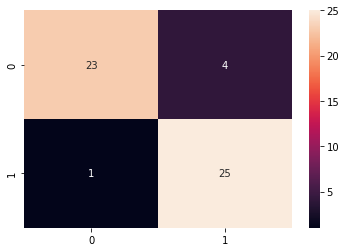

____________________________________________________________________________________________________
LogisticRegression() 

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        27
           1       0.83      0.96      0.89        26

    accuracy                           0.89        53
   macro avg       0.89      0.89      0.89        53
weighted avg       0.90      0.89      0.89        53



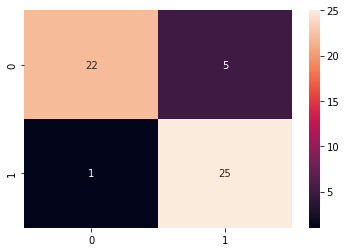

____________________________________________________________________________________________________
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) 

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        27
           1       0.89      0.96   

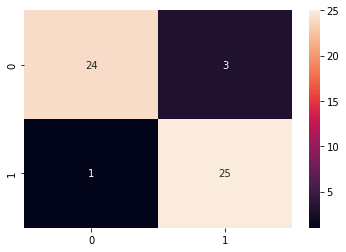

____________________________________________________________________________________________________
MultinomialNB() 

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.80      0.92      0.86        26

    accuracy                           0.85        53
   macro avg       0.86      0.85      0.85        53
weighted avg       0.86      0.85      0.85        53



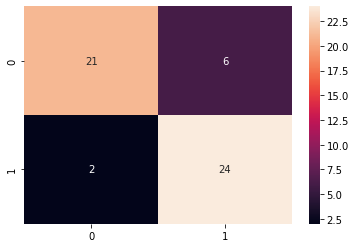

____________________________________________________________________________________________________
BernoulliNB() 

              precision    recall  f1-score   support

           0       0.95      0.78      0.86        27
           1       0.81      0.96      0.88        26

    accuracy                           0.87        53
   macro avg       0.88      0.87      0.87        53
weighted avg       0.88      0.87      0.87        53



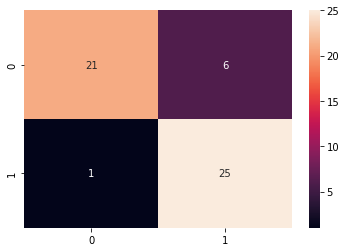

____________________________________________________________________________________________________
GaussianNB() 

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.79      0.85      0.81        26

    accuracy                           0.81        53
   macro avg       0.81      0.81      0.81        53
weighted avg       0.81      0.81      0.81        53



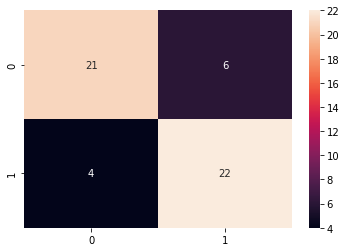

____________________________________________________________________________________________________


In [53]:
train_acc,test_acc = [],[]
train_f1,test_f1 = [],[]
train_auroc,test_auroc = [],[]
train_recall,test_recall = [],[]
train_precision,test_precision = [],[]


L = [dt,rf,ab,gb,knn,bc,ldc,svm,lr,xgb,mnb,bnb,gnb]

for i in L:
    
    # train model 
    model = i.fit(X_train,y_train)
    
    #predict train
    train_pred = model.predict(X_train)
    
    #predict test
    test_pred = model.predict(X_test)
    
    #accuracy train,test
    train_acc.append(mat.accuracy_score(y_train,train_pred))
    test_acc.append(mat.accuracy_score(y_test,test_pred))
    
    #f1 score train,test  
    train_f1.append(mat.f1_score(y_train,train_pred))
    test_f1.append(mat.f1_score(y_test,test_pred))
    
    #auroc train,test
    train_auroc.append(mat.roc_auc_score(y_train,train_pred))
    test_auroc.append(mat.roc_auc_score(y_test,test_pred))
    
    #recall train,test
    train_recall.append(mat.recall_score(y_train,train_pred))
    test_recall.append(mat.recall_score(y_test,test_pred))
    
    #precision train,test
    train_precision.append(mat.precision_score(y_train,train_pred))
    test_precision.append(mat.precision_score(y_test,test_pred))
    
    print(i,"\n")
    print(classification_report(y_test, test_pred))

    cm= mat.confusion_matrix(y_test,test_pred)
    sns.heatmap(cm,annot=True)
    plt.show()
    
    print("__"*50)

### 6. Results -  Model performance on test data

In [62]:
from IPython.display import display_html

In [71]:
df1_def_model = pd.DataFrame({"accuracy":test_acc,"f1_score":test_f1,"auroc":test_auroc,"recall_score":test_recall,"precison":test_precision},
                             index=["decision tree","random forest","adaboost","gradientboost","knn","bagging", "Linear discriminant","support vector machines ",
                                    "logistic regression","xtreme boosting","multinomial naive bayes","bernoulli naive bayes",
                                    "Gaussian naive bayes"
                                    ])
df1_def_model
df1_def_model.style.highlight_max(color = 'lightgreen', axis = 0)

,accuracy,f1_score,auroc,recall_score,precison
decision tree,0.792453,0.792453,0.792735,0.807692,0.777778
random forest,0.886792,0.888889,0.887464,0.923077,0.857143
adaboost,0.886792,0.888889,0.887464,0.923077,0.857143
gradientboost,0.830189,0.842105,0.831909,0.923077,0.774194
knn,0.660377,0.718750,0.664530,0.884615,0.605263
bagging,0.792453,0.792453,0.792735,0.807692,0.777778
Linear discriminant,0.754717,0.779661,0.757123,0.884615,0.696970
support vector machines,0.905660,0.909091,0.906695,0.961538,0.862069
logistic regression,0.886792,0.892857,0.888177,0.961538,0.833333
xtreme boosting,0.924528,0.925926,0.925214,0.961538,0.892857
